In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('diabetes.csv')
print(data.head(15))

    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0             0              1           never  25.19   
1   Female  54.0             0              0         No Info  27.32   
2     Male  28.0             0              0           never  27.32   
3   Female  36.0             0              0         current  23.45   
4     Male  76.0             1              1         current  20.14   
5   Female  20.0             0              0           never  27.32   
6   Female  44.0             0              0           never  19.31   
7   Female  79.0             0              0         No Info  23.86   
8     Male  42.0             0              0           never  33.64   
9   Female  32.0             0              0           never  27.32   
10  Female  53.0             0              0           never  27.32   
11  Female  54.0             0              0          former  54.70   
12  Female  78.0             0              0          former  3

In [5]:
X = data.drop('diabetes', axis=1)
Y = data['diabetes']

print(X.head(15))
print(Y.head(15))

    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0             0              1           never  25.19   
1   Female  54.0             0              0         No Info  27.32   
2     Male  28.0             0              0           never  27.32   
3   Female  36.0             0              0         current  23.45   
4     Male  76.0             1              1         current  20.14   
5   Female  20.0             0              0           never  27.32   
6   Female  44.0             0              0           never  19.31   
7   Female  79.0             0              0         No Info  23.86   
8     Male  42.0             0              0           never  33.64   
9   Female  32.0             0              0           never  27.32   
10  Female  53.0             0              0           never  27.32   
11  Female  54.0             0              0          former  54.70   
12  Female  78.0             0              0          former  3

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.head(15))
print("\n\n\n")
print(X_test.head(15))
print("\n\n\n")
print(Y_train.head(15))
print("\n\n\n")
print(Y_test.head(15))

       gender    age  hypertension  heart_disease smoking_history    bmi  \
75220    Male  73.00             0              0          former  24.77   
48955    Male  80.00             0              0           never  24.60   
44966  Female  38.00             0              0            ever  24.33   
13568  Female  26.00             0              0     not current  18.87   
92727  Female  61.00             1              0         current  22.11   
51349  Female  34.00             0              0           never  19.46   
86979  Female  42.00             0              0          former  27.32   
3806     Male  51.00             0              0           never  27.32   
91822  Female  20.00             0              0         current  21.37   
6006     Male  10.00             0              0         No Info  17.70   
55086  Female  27.00             0              0           never  28.81   
44204  Female  49.00             0              0            ever  48.21   
32409    Mal

In [7]:
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")
    else:
        min_value = data[column].min()
        max_value = data[column].max()
        print(f"Column '{column}' has a range from {min_value} to {max_value}")
        print("\n")

Column 'gender' has 3 unique values:
['Female' 'Male' 'Other']


Column 'age' has a range from 0.08 to 80.0


Column 'hypertension' has a range from 0 to 1


Column 'heart_disease' has a range from 0 to 1


Column 'smoking_history' has 6 unique values:
['never' 'No Info' 'current' 'former' 'ever' 'not current']


Column 'bmi' has a range from 10.01 to 95.69


Column 'HbA1c_level' has a range from 3.5 to 9.0


Column 'blood_glucose_level' has a range from 80 to 300


Column 'diabetes' has a range from 0 to 1




In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first') # drop=first ki wajah se final me 15 nahi 13 hi aa rhe (80000,13) ka array
X_train_encoded = ohe.fit_transform(X_train[['gender', 'smoking_history']])
X_test_encoded = ohe.transform(X_test[['gender', 'smoking_history']])

print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)
print("\n\n")
X_train_encoded


X_train_encoded shape: (80000, 7)
X_test_encoded shape: (20000, 7)





array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
X_train_remain = X_train.drop(columns=['gender', 'smoking_history']).values
X_test_remain = X_test.drop(columns=['gender', 'smoking_history']).values
X_train_remain.shape

X_train2 = np.concatenate((X_train_remain, X_train_encoded), axis=1)
X_train2.shape
print("\n")
X_test2 = np.concatenate((X_test_remain, X_test_encoded), axis=1)
X_test2.shape

(20000, 13)

In [10]:
print(X_train2[:10])

[[ 73.     0.     0.    24.77   3.5   80.     1.     0.     0.     0.
    1.     0.     0.  ]
 [ 80.     0.     0.    24.6    5.7  145.     1.     0.     0.     0.
    0.     1.     0.  ]
 [ 38.     0.     0.    24.33   4.   158.     0.     0.     0.     1.
    0.     0.     0.  ]
 [ 26.     0.     0.    18.87   5.   100.     0.     0.     0.     0.
    0.     0.     1.  ]
 [ 61.     1.     0.    22.11   4.5   85.     0.     0.     1.     0.
    0.     0.     0.  ]
 [ 34.     0.     0.    19.46   5.7  126.     0.     0.     0.     0.
    0.     1.     0.  ]
 [ 42.     0.     0.    27.32   5.7  140.     0.     0.     0.     0.
    1.     0.     0.  ]
 [ 51.     0.     0.    27.32   7.   130.     1.     0.     0.     0.
    0.     1.     0.  ]
 [ 20.     0.     0.    21.37   6.2  200.     0.     0.     1.     0.
    0.     0.     0.  ]
 [ 10.     0.     0.    17.7    6.6  100.     1.     0.     0.     0.
    0.     0.     0.  ]]


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_train_scaled.shape

(80000, 13)

In [12]:
import math

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None

    def fit(self, X, Y):
        num_samples, num_features = X.shape
        self.w = np.zeros(num_features)
        self.b = 0

        for _ in range(self.num_iterations):
            linear_pred = np.dot(X, self.w) + self.b
            predictions = sigmoid(linear_pred)

            dw = (1/num_samples) * np.dot(X.T, (predictions - Y))
            db = (1/num_samples) * np.sum(predictions - Y)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        linear_pred = np.dot(X, self.w) + self.b
        y_pred = sigmoid(linear_pred)
        predictions = [1 if y >= 0.5 else 0 for y in y_pred]
        return predictions


In [13]:
lr = LogisticRegression(learning_rate=0.01, num_iterations=10000)

lr.fit(X_train_scaled, Y_train)

train_predictions = lr.predict(X_train_scaled)
test_predictions = lr.predict(X_test_scaled)

correct_train_predictions = sum(1 for y_true, y_pred in zip(Y_train, train_predictions) if y_true == y_pred)
correct_test_predictions = sum(1 for y_true, y_pred in zip(Y_test, test_predictions) if y_true == y_pred)

total_train_samples = len(Y_train)
total_test_samples = len(Y_test)

accuracy_train = correct_train_predictions / total_train_samples
accuracy_test = correct_test_predictions / total_test_samples

accuracy_train_score = accuracy_train * 100  
accuracy_test_score = accuracy_test * 100 
print("Accuracy Score for Train Data: {:.2f}%".format(accuracy_train_score))
print("Accuracy Score for Test Data: {:.2f}%".format(accuracy_test_score))

Accuracy Score for Train Data: 95.99%
Accuracy Score for Test Data: 95.81%


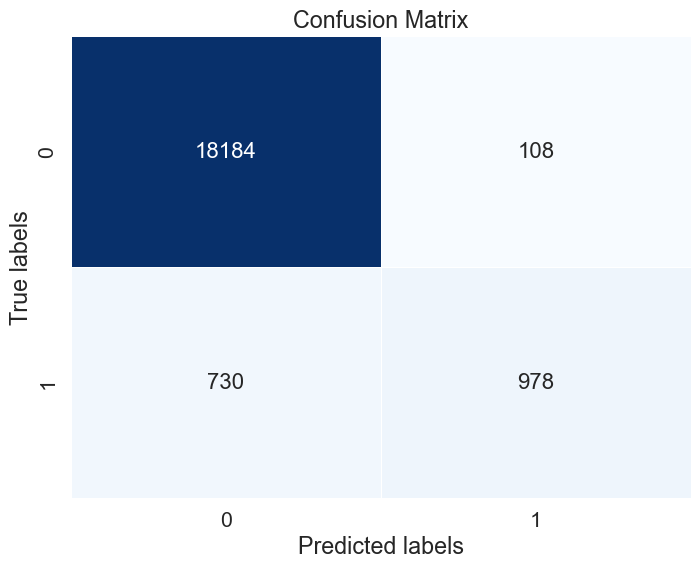

In [14]:
cm = confusion_matrix(Y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False,
            annot_kws={"size": 16}, linewidths=0.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
